In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X, y = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier([('log', log_clf), ('rnd', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log', LogisticRegression()),
                             ('rnd', RandomForestClassifier()),
                             ('svc', SVC())])

In [3]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8245
RandomForestClassifier 0.8385
SVC 0.8485
VotingClassifier 0.846


# Bagging and Pasting in Scikit-Learn

In [5]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
# n_estimators is the number of predictors in the ensemble; max_samples is the number of samples that each predictor looks at
# bootstrap = True --> we are doing bagging (sampling w/ replacement), which is usually better than pasting.
# n_jobs decides how many cores of the cpu that we want to dedicate to training the predictors; setting n_jobs=-1 uses all available cpu cores.
bag_clf.fit(X_train, y_train)

In [8]:
y_preds = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.846

# Random Forests

### Feature Importance

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09439594823047433
sepal width (cm) 0.02204272117627575
petal length (cm) 0.44005404378672663
petal width (cm) 0.4435072868065233


In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [14]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

In [15]:
mnist_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
mnist_clf.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

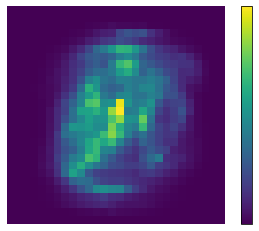

In [27]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
    
plot_digit(mnist_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])

### AdaBoostClassifer

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME.R', learning_rate=0.5)
ada_clf.fit(X, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

## GradientBoost

In [35]:
from sklearn.tree import DecisionTreeRegressor

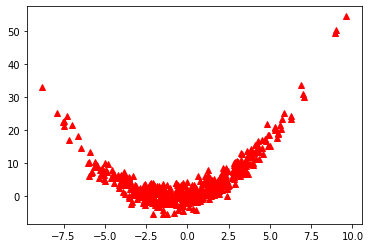

In [58]:
X = 3*np.random.randn(500)
y = 1/2 * X**2 + X + 2*np.random.randn(500)
plt.plot(X, y, 'r^')

In [47]:
tree1 = DecisionTreeRegressor(max_depth=2)
tree2 = DecisionTreeRegressor(max_depth=2)
tree3 = DecisionTreeRegressor(max_depth=2)
X, y = X.reshape(-1, 1), y.reshape(-1, 1)
tree1.fit(X, y)
pred1 = tree1.predict(X)

tree2.fit(X, y-pred1)
pred2 = tree2.predict(X)

tree3.fit(X, y-pred2)

y_pred = sum(tree.predict(X) for tree in (tree1, tree2, tree3))

In [77]:
# Identically, we can do the following using scikit-learn:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0)
gbrt.fit(X.reshape(-1,1), y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2)

In [78]:
y_pred2 = gbrt.predict(X.reshape(-1,1))

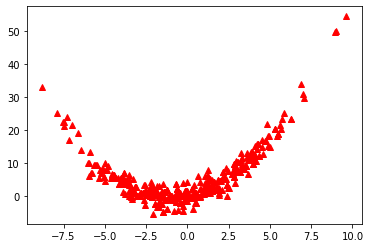

In [79]:
plt.plot(X, y_pred2, 'r^')

#### Eearly Stopping Gradient Boost

In [93]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

warm_gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
best = float('inf')
increasing_score = 0

for n_trees in range(1, 121):
    warm_gbrt.n_estimators = n_trees
    warm_gbrt.fit(X_train.reshape(-1,1), y_train)
    preds = warm_gbrt.predict(X_val.reshape(-1,1))
    score = mean_squared_error(y_val, preds)
    
    if score < best:
        best = score
        increasing_score = 0
    else:
        increasing_score += 1

    if increasing_score >= 5:
        print("We think the best number of trees is: " + str(n_trees - 5))
        break

We think the best number of trees is: 52
